# Лабораторная работа №3
Оценки.

# # Равномерное распределение


In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rc('font', family='Verdana')

import matplotlib.pyplot as plt
import scipy.stats as sts
from mpl_toolkits.mplot3d import Axes3D

Сформируем k=20 выборок объёма n=10.

In [2]:
a = 0
b = 10
n = 10
k = np.empty((20,n),  dtype=float)
# зададим непрерывно распределенную случайную величину 
uniform_rv = sts.uniform(a, b-a)

# сгенерируем 10 значений для каждой выборки
for i in range(0,20):
    k[i] = uniform_rv.rvs(size=n)

Получим первую оценку а1


In [3]:
a1 = np.empty(20)
for i in range (0,20):
    a1[i] = 2*np.sum(k[i])/n
print (a1)
#Её размах как разницу максимального и минимального значений
a1w = np.amax(a1) - np.amin(a1)
print("размах = " + str(np.amax(a1)))
#И среднеквадратичное отклонение
Sa1 = np.std(a1)
print("среднеквадратичное отклонение = " + str(Sa1))

[  7.60656192  11.5064459    8.80434653  10.86763025  11.41091234
  12.23360889   9.14362892   9.46380564  13.48767942  10.62030373
  11.29026514  12.23533028   9.64601116  10.63575229   8.88800422
   7.70958224  10.26403838  10.05721387  12.00413205   9.61649166]
размах = 13.4876794162
среднеквадратичное отклонение = 1.51382564279


Получим вторую оценку a2 и её характеристики

In [4]:
a2 = np.empty(20)
for i in range (0,20):
    a2[i] = (n+1)*np.max(k[i])/n
print (a2)
#Её размах как разницу максимального и минимального значений
a2w = np.amax(a2) - np.amin(a2)
print("размах = " + str(np.amax(a2)))
#И среднеквадратичное отклонение
Sa2 = np.std(a2)
print("среднеквадратичное отклонение = " + str(Sa2))

[  9.20200763   9.97529781   8.70685441   9.0207656   10.611186
  10.99529223  10.24288354  10.99641273  10.34768537   9.96734654
  10.87013935  10.89941889   9.64625744   9.90223106   9.87929846
  10.5525742    9.37296344  10.30060358  10.47806284  10.02683734]
размах = 10.9964127314
среднеквадратичное отклонение = 0.645799403163


Получим третью оценку a3 и её характеристики

In [5]:
a3 = np.empty(20)
for i in range (0,20):
    a3[i] = 2*np.median(k[i])
print (a3)
#Её размах как разницу максимального и минимального значений
a1w = np.amax(a3) - np.amin(a3)
print("размах = " + str(np.amax(a3)))
#И среднеквадратичное отклонение
Sa3 = np.std(a3)
print("среднеквадратичное отклонение = " + str(Sa3))

[  5.04754085  13.14463847   9.46223834  12.31003384  11.619046
  13.73079022   8.87822418   6.80794869  14.79370301  10.56503089
  12.50461881  13.15117205  10.81019739  10.23429256   8.73938317
   5.89412543  10.71266459   9.06851612  12.03541362  11.63058504]
размах = 14.7937030131
среднеквадратичное отклонение = 2.53634929502


А теперь после того как все оценки для выборок объёма 10 получены построим графическое сравнение

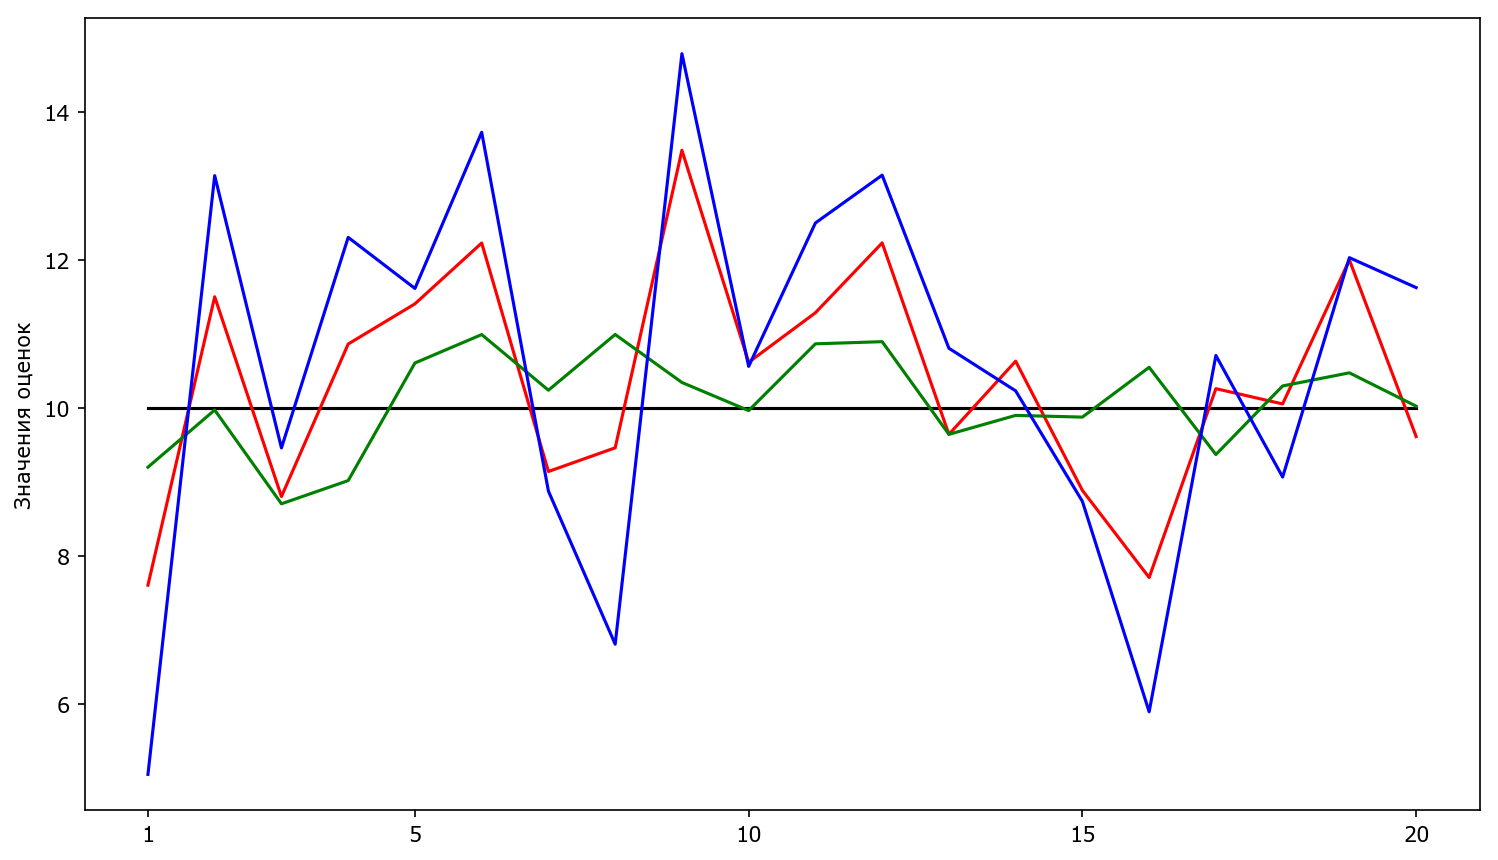

In [7]:
x = np.linspace(1,20,20)
plt.figure(figsize=(12,7),dpi=150)
plt.plot([1,20],[10,10],"black")
plt.plot(x,a1,'r-')
plt.plot(x,a2,'g-')
plt.plot(x,a3,'b-')
plt.xticks([1, 5,10,15,20])
plt.ylabel('Значения оценок')
plt.show()

Теперь повторим процесс для n=40

[[ 1.76608756  1.16813893  0.48118899]
 [ 1.06315457  0.27824386  0.06461865]
 [ 2.63663343  1.82145236  0.76928402]]


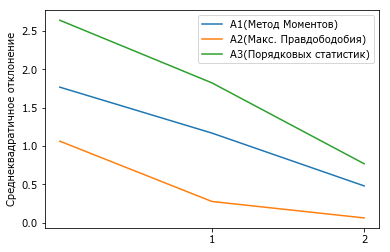

In [8]:
def pereschet(n):
    a = 0
    b = 10

    k = np.empty((20,n),  dtype=float)
    uniform_rv = sts.uniform(a, b-a)
    for i in range(0,20):
        k[i] = uniform_rv.rvs(size=n)
    a1 = np.empty(20)
    
    for i in range (0,20):
        a1[i] = 2*np.sum(k[i])/n
    a1w = np.amax(a1) - np.amin(a1)
    Sa1 = np.std(a1)
    
    a2 = np.empty(20)
    for i in range (0,20):
        a2[i] = (n+1)*np.max(k[i])/n
    a2w = np.amax(a2) - np.amin(a2)
    Sa2 = np.std(a2)
    
    a3 = np.empty(20)
    for i in range (0,20):
        a3[i] = 2*np.median(k[i])
    a1w = np.amax(a3) - np.amin(a3)
    Sa3 = np.std(a3)
    Sa = np.array([Sa1,Sa2,Sa3])
    
    return Sa;

x = np.linspace(0,160,3)
SaCompl = np.empty([3,3])
SaCompl[0] = pereschet(10)
SaCompl[1] = pereschet(40)
SaCompl[2] = pereschet(160)

SaCompl = np.transpose(SaCompl)
print (SaCompl)
plt.plot(SaCompl[0], label="A1(Метод Моментов)")
plt.plot(SaCompl[1], label="A2(Макс. Правдободобия)")
plt.plot(SaCompl[2], label="A3(Порядковых статистик)")
plt.xticks([1, 2])
plt.legend()
plt.ylabel('Среднеквадратичное отклонение')

plt.show()

Отсюда видно что оценка А2 - наиболее точна а оценка А3 - наименее.


# # Среднее нормальное распределение (Матожидание)



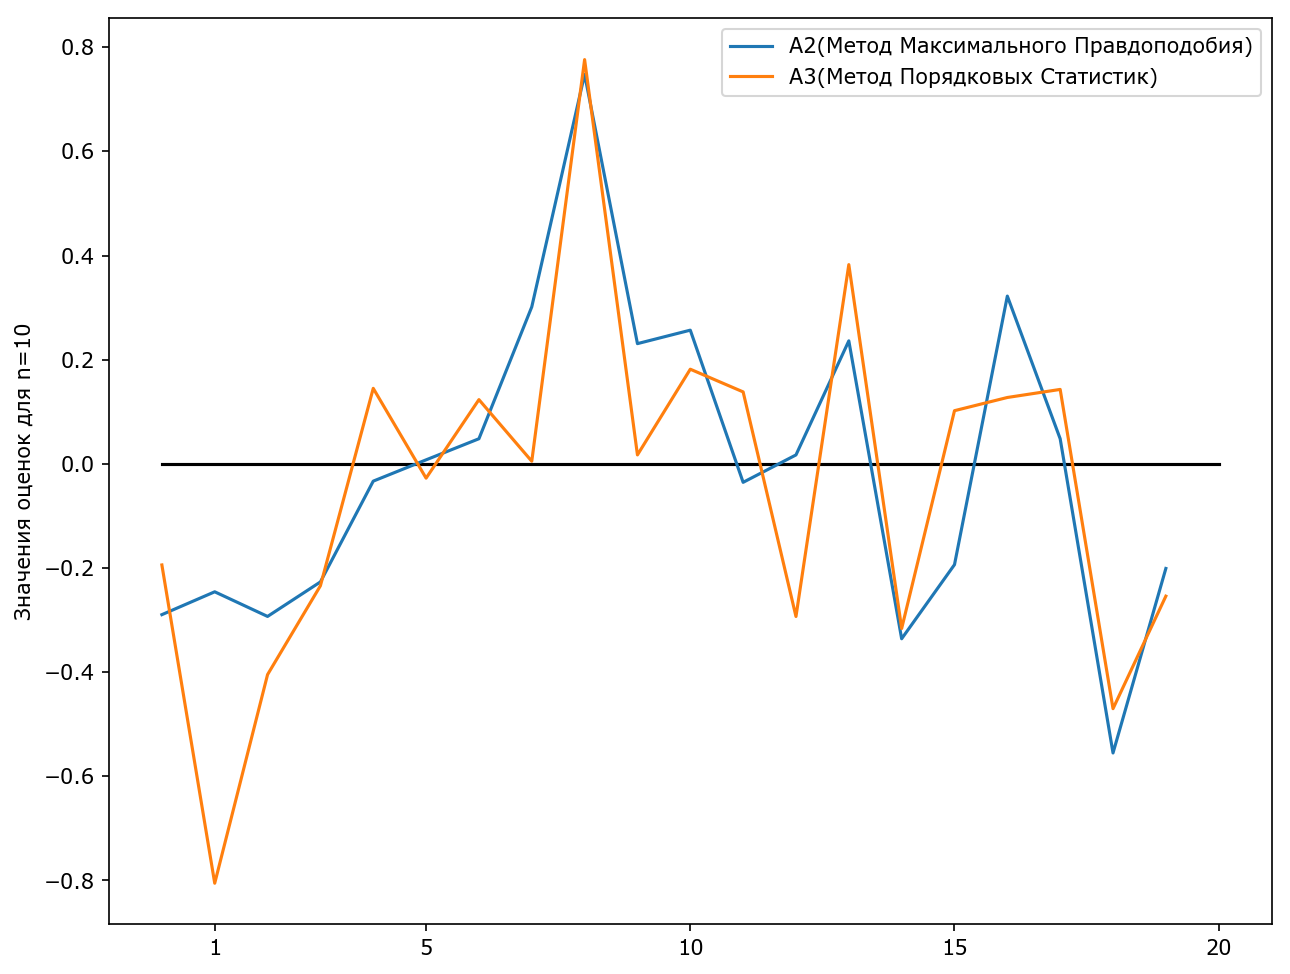

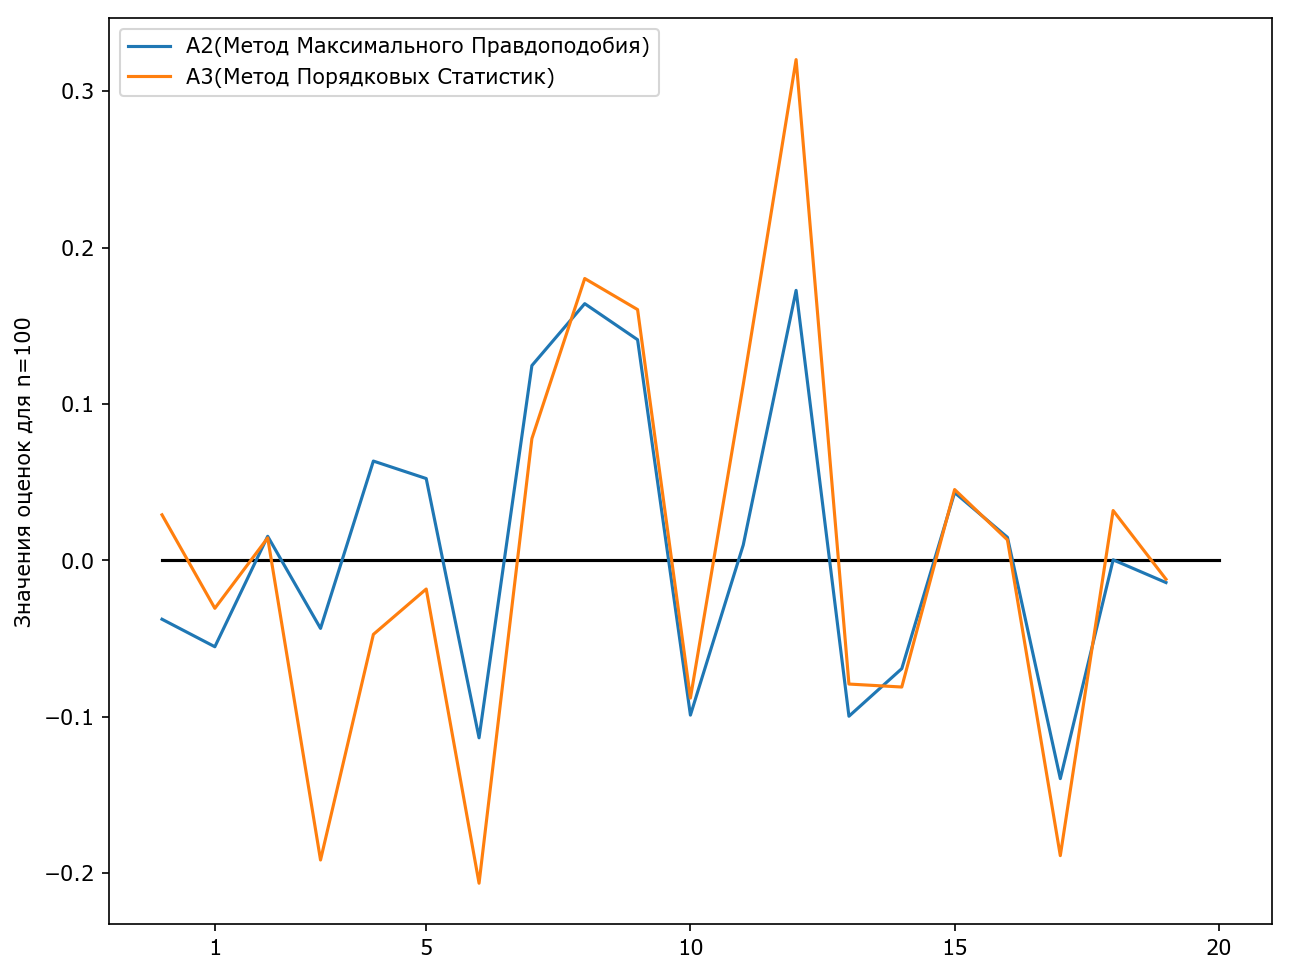

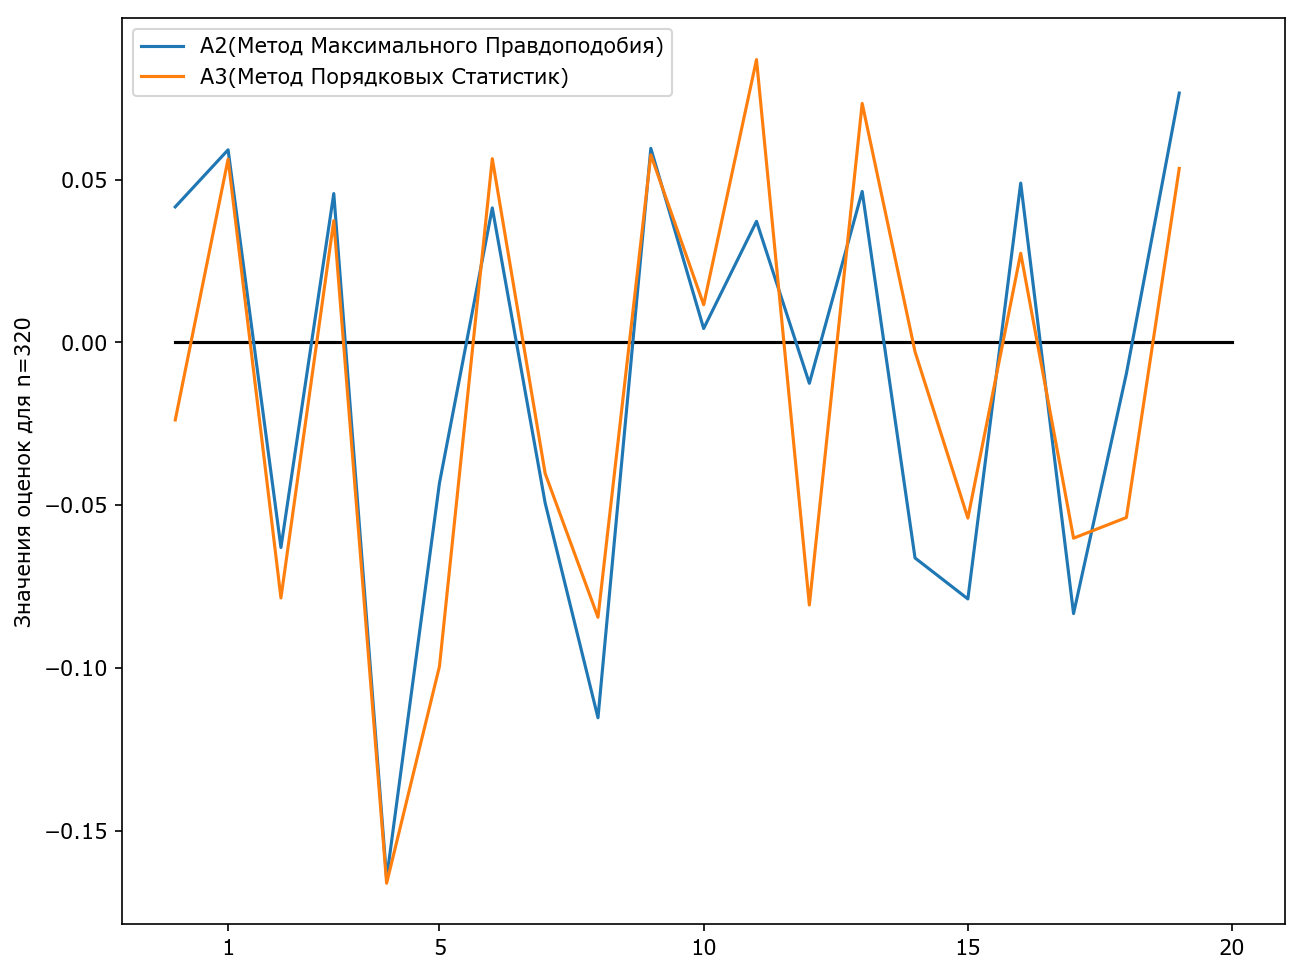

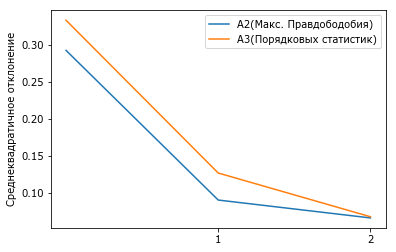

In [9]:
def pereschet2(n):
    k = np.empty((20,n),  dtype=float)

    mu = 0
    sigma = 1
    # зададим нормально распределенную случайную величину
    norm_rv = sts.norm(loc=mu, scale=sigma)
    
    for i in range(0,20):
        k[i] = norm_rv.rvs(size=n)
    # Поскольку оценка методом моментов для нормального распределения - 1/n сигма xi
    a1 = np.empty(20)
    for i in range (0,20):
         a1[i] = np.sum(k[i])/n
    a1w = np.amax(a1) - np.amin(a1)
    Sa1 = np.std(a1)
    
    a2 = np.empty(20)
    for i in range (0,20):
        a2[i] = np.sum(k[i])/n
    a2w = np.amax(a2) - np.amin(a2)
    Sa2 = np.std(a2)
    
    a3 = np.median(k, axis=1)
    a3w = np.amax(a3) - np.amin(a3)
    Sa3 = np.std(a3)
    
    Sa = np.array([Sa1,Sa2,Sa3])
        #Рисуем значения оценок    
    x = np.linspace(1,20,20)
    plt.figure(figsize=(10,8),dpi=150)
    plt.plot([0,20],[0,0],"black")
    plt.plot(a2, label="A2(Метод Максимального Правдоподобия)")
    plt.plot(a3, label="A3(Метод Порядковых Статистик)")
    plt.legend()
    plt.xticks([1, 5,10,15,20])
    plt.ylabel('Значения оценок для n='+str(n))
    plt.show()
    return Sa;

x2 = np.linspace(0,160,3)
SaComp2 = np.empty([3,3])
SaComp2[0] = pereschet2(10)
SaComp2[1] = pereschet2(100)
SaComp2[2] = pereschet2(320)

SaComp2 = np.transpose(SaComp2)
#print ("Оценка матожидания.")
plt.plot(SaComp2[1], label="A2(Макс. Правдободобия)")
plt.plot(SaComp2[2], label="A3(Порядковых статистик)")
plt.xticks([1,2])
plt.legend()
plt.ylabel('Среднеквадратичное отклонение')

plt.show()

Сравнение значений размахов w и СКО Sа для 2 оценок показывает, что оценка a1 (х1,...,хn) более точна, чем оценка a2 (х1, ..., хn).

## Экспонецниальное распределение
(Параметр a=3, обратный ему параметр соотв. = 1/3)

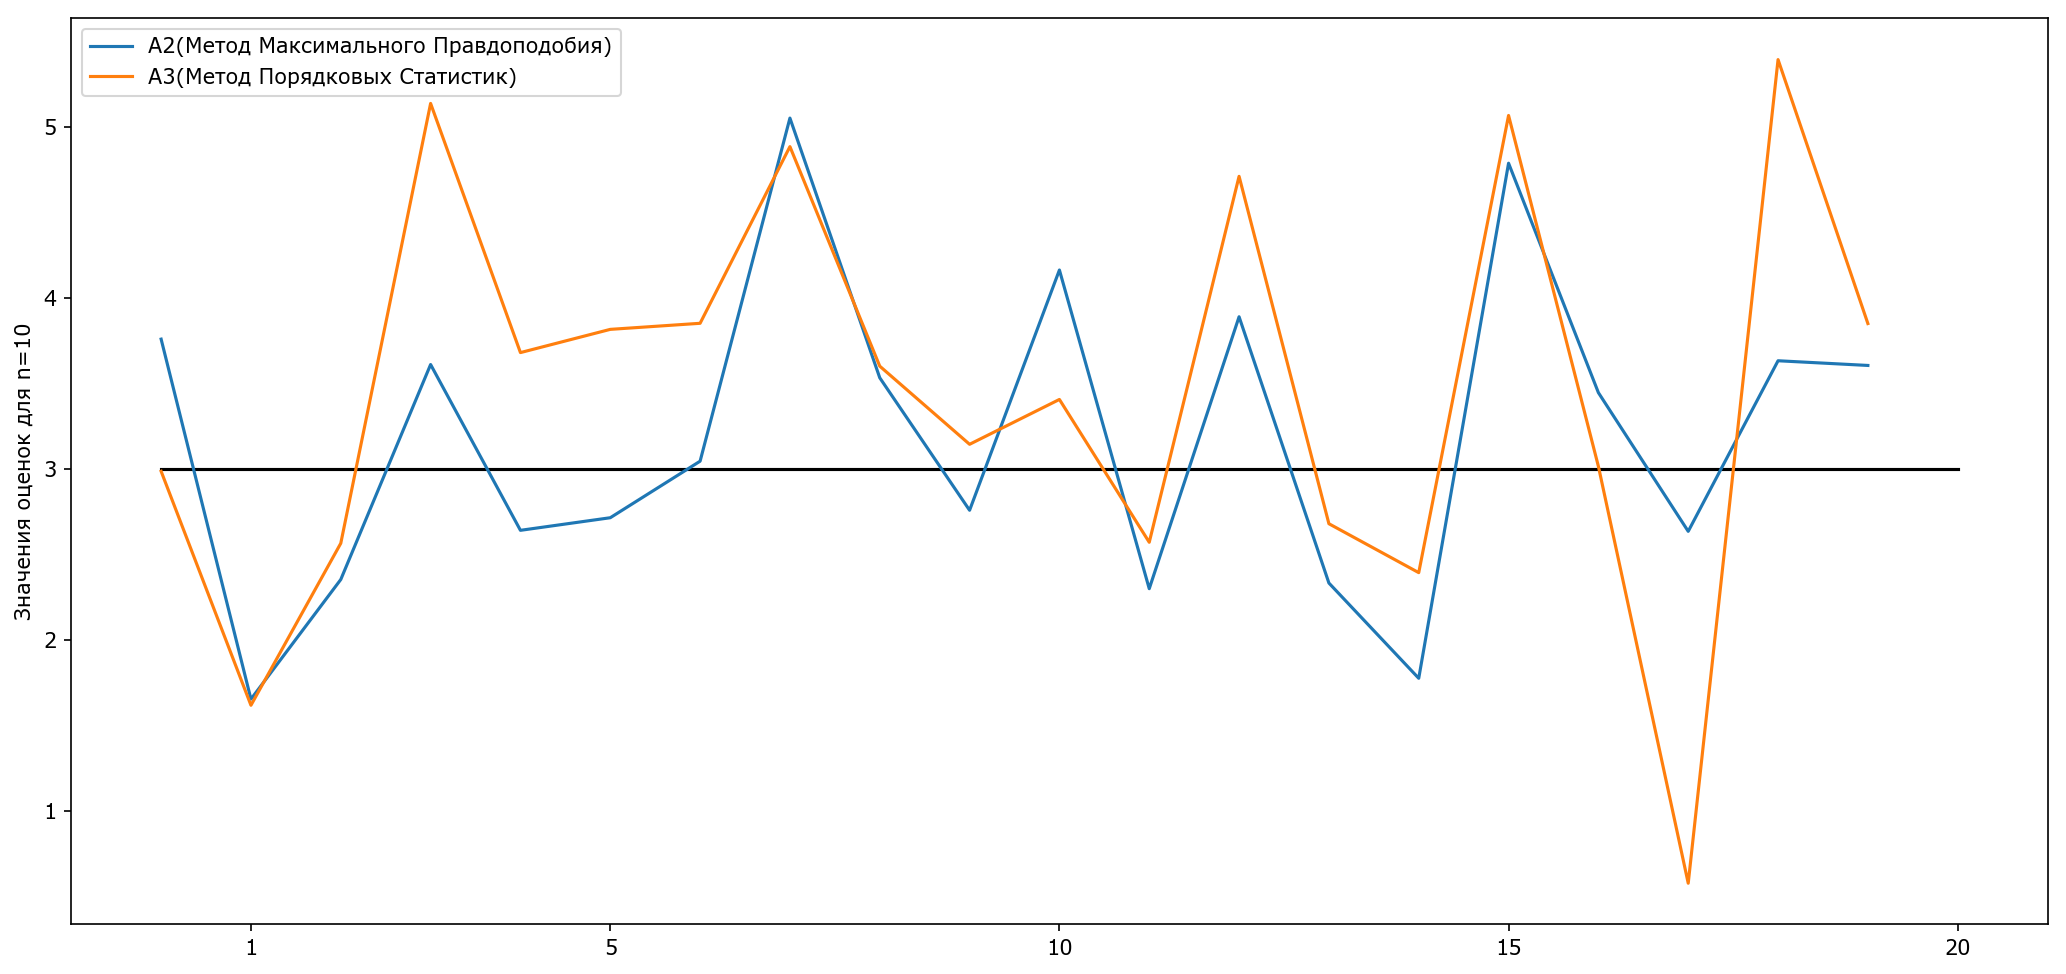

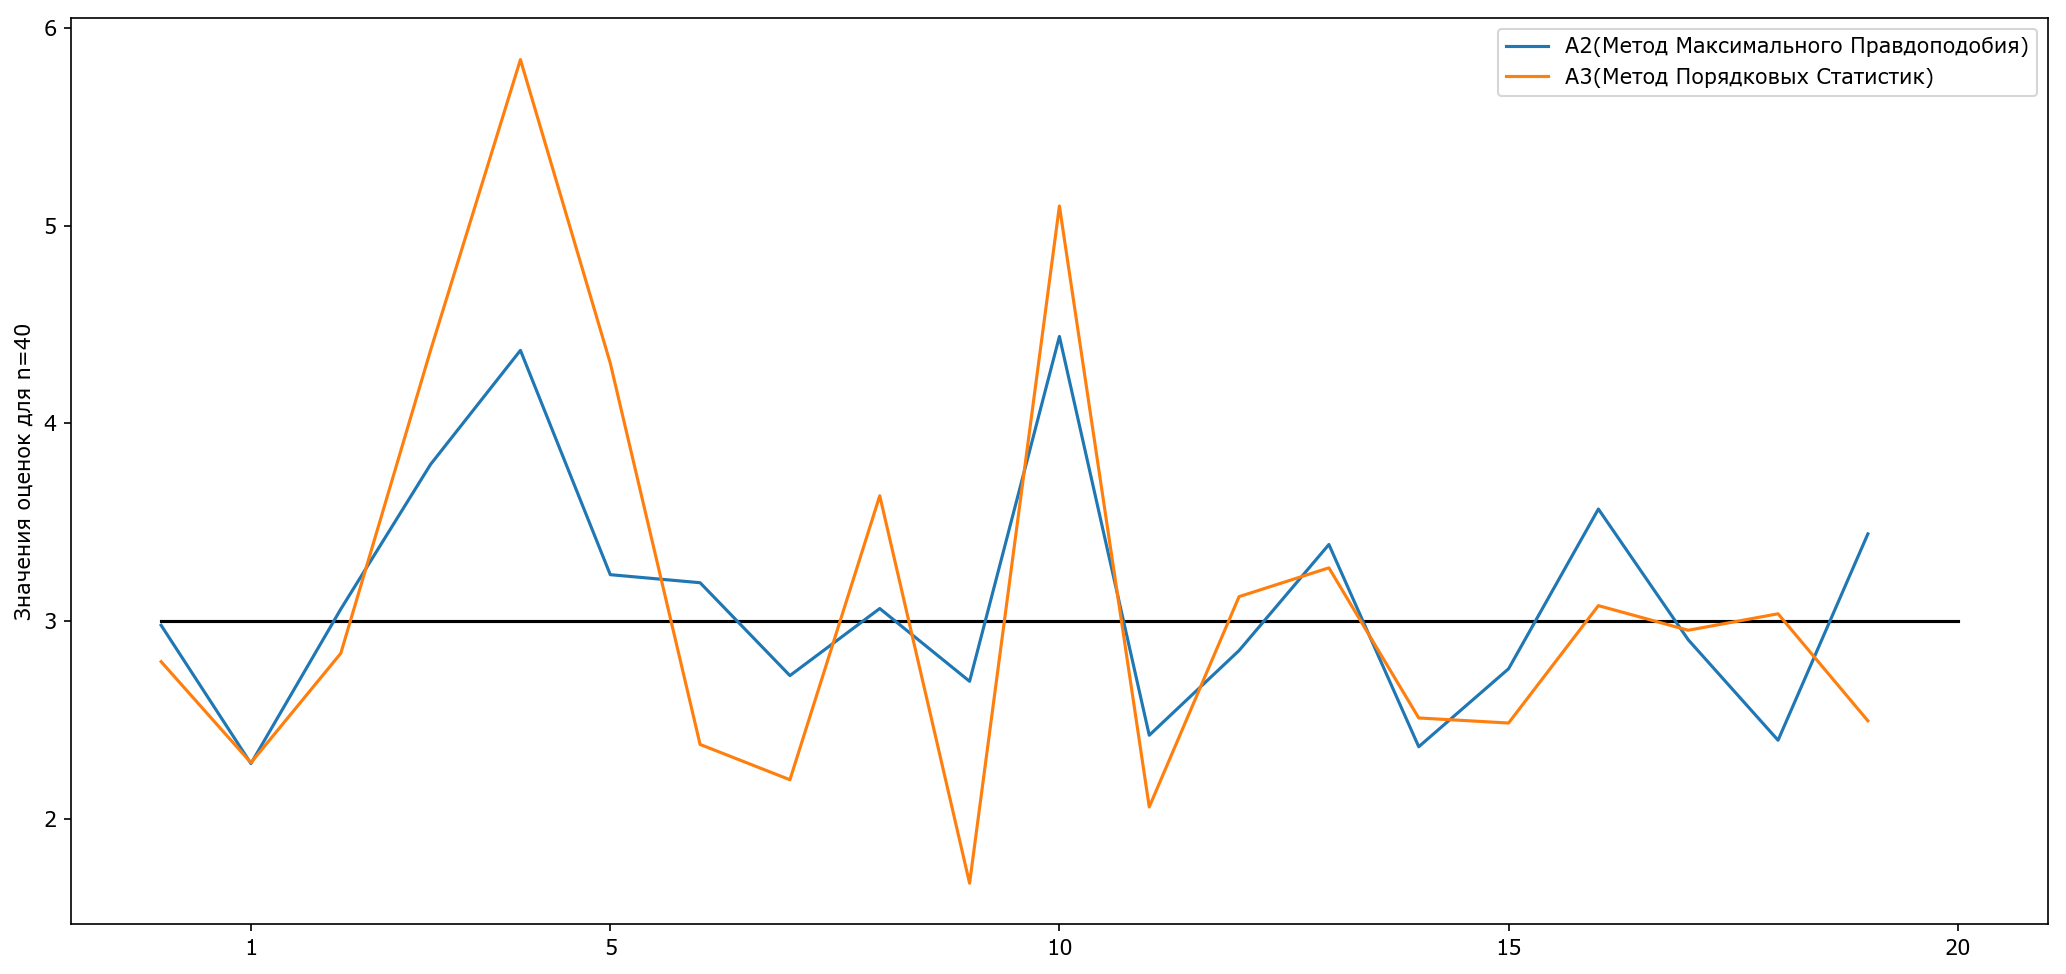

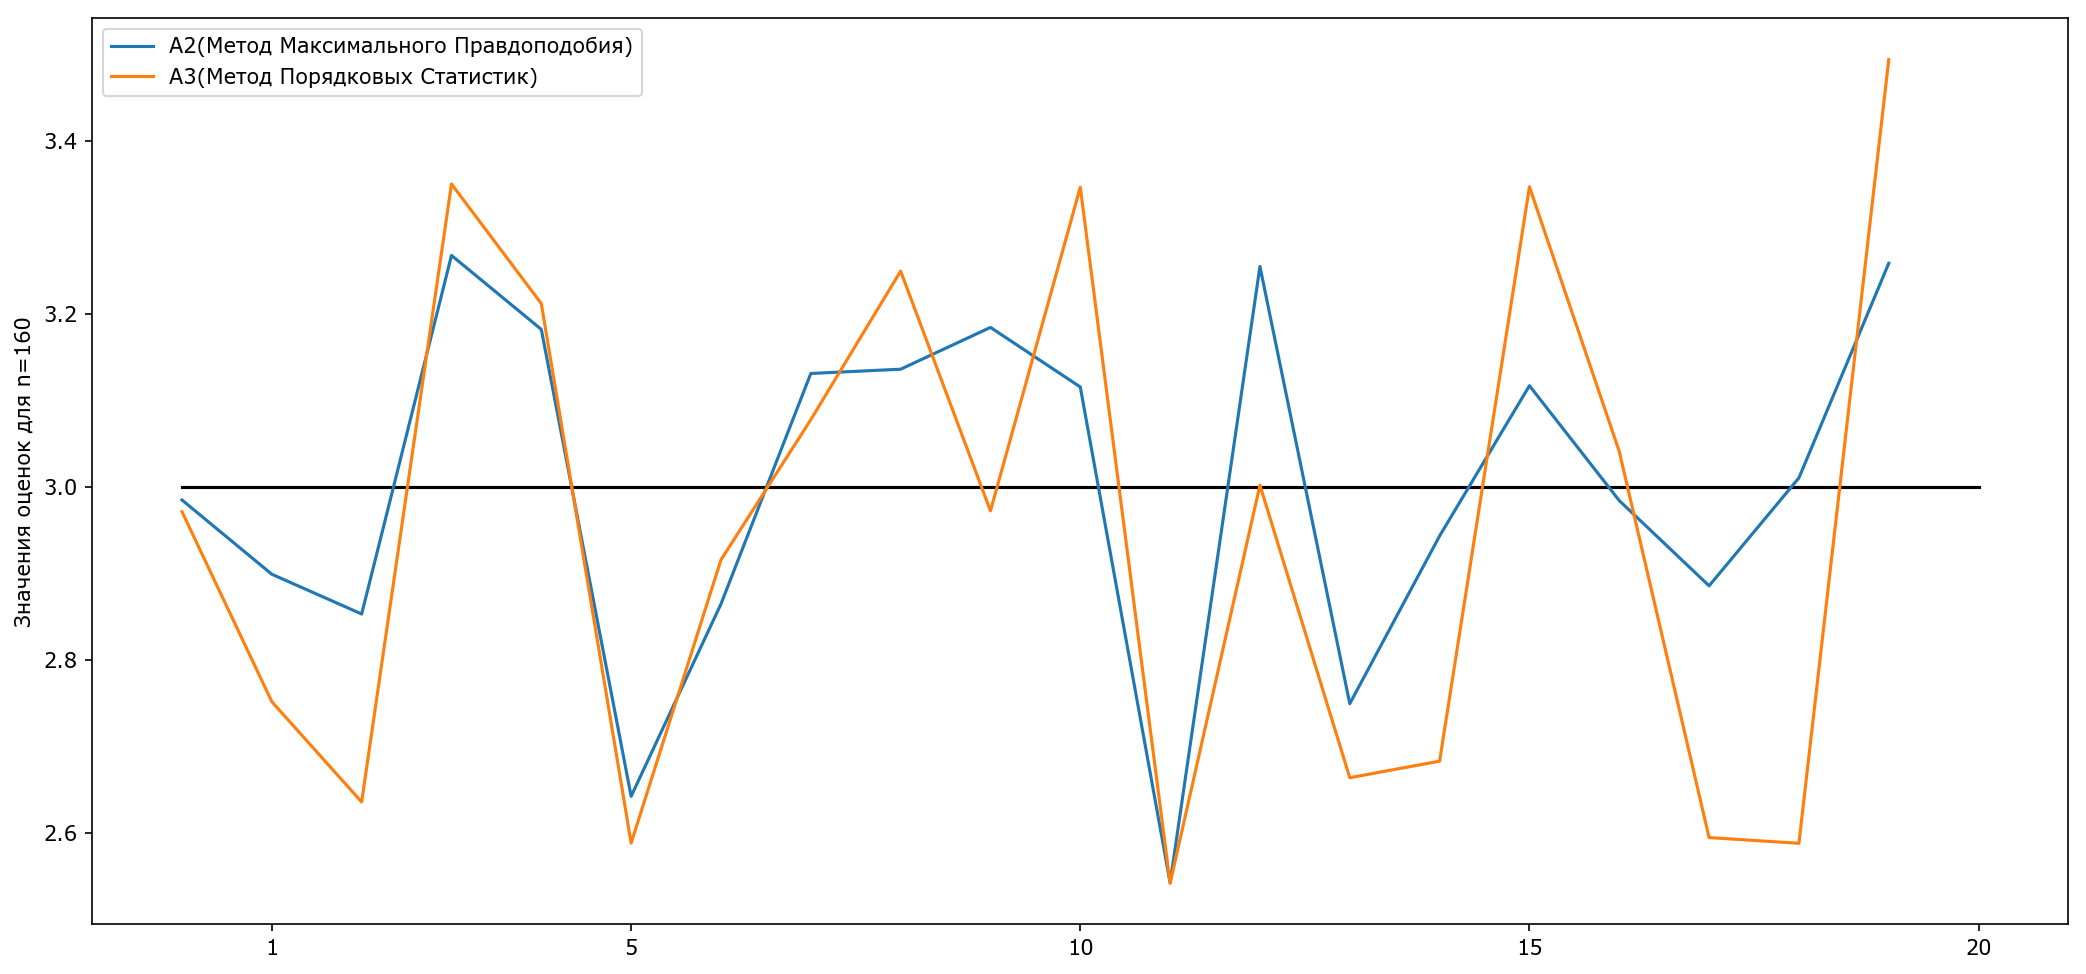

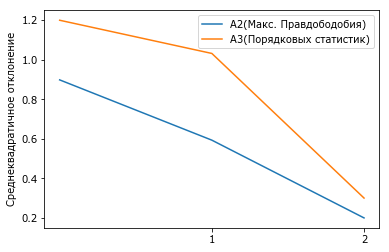

In [10]:
def pereschet3(n):

    lambd = 3
    k3 = np.empty((20,n),  dtype=float)
    # зададим нормально распределенную случайную величину
    exp_rv = sts.expon(scale=lambd)
    
    for i in range(0,20):
        k3[i] = exp_rv.rvs(size=n)
    
    a1 = np.empty(20)
#     for i in range (0,20):
#         a1[i] = 2*np.sum(k3[i])/n
#     a1w = np.amax(a1) - np.amin(a1)
#     Sa1 = np.std(a1)
    
    a2 = np.empty(20)
    for i in range (0,20):
        a2[i] = (np.sum(k3[i]))/n
    a2w = np.amax(a2) - np.amin(a2)
    Sa2 = np.std(a2)

    a3 = np.empty(20)
    a3 = np.median(k3, axis=1)/np.log(2) 
    a3w = np.amax(a3) - np.amin(a3)
    Sa3 = np.std(a3)
    
    Sa = np.array([Sa1,Sa2,Sa3])
            #Рисуем значения оценок    
    x = np.linspace(1,20,20)
    plt.figure(figsize=(17,8),dpi=150)
    plt.plot([0,20],[lambd,lambd],"black")
    #plt.plot(a1, label="A1(Метод Моментов)")
    plt.plot(a2, label="A2(Метод Максимального Правдоподобия)")
    plt.plot(a3, label="A3(Метод Порядковых Статистик)")
    plt.legend()
    plt.xticks([1, 5,10,15,20])
    plt.ylabel('Значения оценок для n='+str(n))
    plt.show()
    return Sa;

x3 = np.linspace(0,160,3)
SaComp3 = np.empty([3,3])
SaComp3[0] = pereschet3(10)
SaComp3[1] = pereschet3(40)
SaComp3[2] = pereschet3(160)

SaComp3 = np.transpose(SaComp3)
#plt.plot(SaComp3[0], label="A1(Метод Моментов)")
plt.plot(SaComp3[1], label="A2(Макс. Правдободобия)")
plt.plot(SaComp3[2], label="A3(Порядковых статистик)")
plt.xticks([1,2])

plt.legend()
plt.ylabel('Среднеквадратичное отклонение')

plt.show()

Сравнение значений размахов w и СКО Sа для 2 оценок показывает, что оценка a3 (х1, ... , хn) более точна, чем оценка a2 (х1, ... , хn).
Приведенные результаты экспериментального сравнения 3 способов обработки наблюдений показывают следующее:
1. Значения оценок концентрируются в окрестности оцениваемого параметра (проявление свойства несмещенности оценок).
2. С ростом числа наблюдений точность (величина разброса) оценок улучшается (проявление свойства состоятельности).


In [11]:
N=14
print(math.ceil((N-1)/3) +1)
print(((N-1)%3) +1)


NameError: name 'math' is not defined

In [12]:
a = sts.poisson(6)
s = a.rvs(20)
print(s)
print(s.sum()/20)

[ 5  3  6  7  6  4  5  7  6  6  6  8  8  8  4  5  6 10  5  1]
5.8


In [13]:
import math

f=0
for i in range(0,30):
    f += (((4*5.7)**i)/math.factorial(i))*math.exp(-4*5.7)

print(str(f))
print(str(1-f))

0.915467151342281
0.08453284865771904
